### **Проектная работа**


факультет: Искусственного интеллекта<br>
тема: Теория вероятностей и математическая статистика - анализ зависимостей<br>
автор: Сатюкова Алена

Данные для исследования и анализа взяты из открытого источника:
https://www.imdb.com/interfaces/
https://datasets.imdbws.com/

#### **Данные**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

%matplotlib inline

In [2]:
basics = pd.read_csv('title.basics.tsv.gz', sep='\t', encoding='utf-8')
ratings = pd.read_csv('title.ratings.tsv.gz', sep='\t', encoding='utf-8')

In [3]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [4]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1496
1,tt0000002,6.3,181
2,tt0000003,6.6,1136
3,tt0000004,6.4,110
4,tt0000005,6.2,1837


#### **Анализ средней продолжительности фильмов в зависимости от жанра**

Предположение: жанр влияет на среднюю продолжительность фильма<br>
Гипотеза H0: средняя продолжительность фильма не зависит от жанра<br>
Гипотеза H1: средняя продолжительность фильма зависит от жанра. 

In [5]:
# изучим доступные типы видео:
title_types = basics.titleType.unique()
print(title_types)

['short' 'movie' 'tvMovie' 'tvSeries' 'tvEpisode' 'tvShort' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame']


In [6]:
# выберем кино (movie):
movies = basics[basics.titleType == 'movie']
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
145,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,\N,20,"Documentary,News,Sport"
332,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,\N,\N,"Biography,Drama"
499,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
571,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Biography,Crime,Drama"


In [7]:
# удалим записи в которых не указана продолжительность фильма
# поменяем формат поля runtimeMinutes на int
movies = movies[movies.runtimeMinutes != '\\N']
movies['runtimeMinutes'] = movies['runtimeMinutes'].apply(lambda x: int(x))

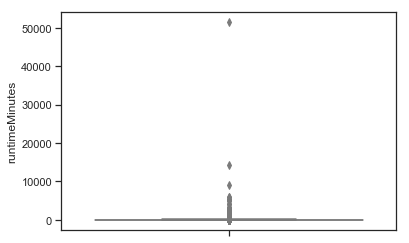

In [8]:
# посмотрим на распределение продолжительности фильмов в минутах:
sns.set(style="ticks", palette="pastel")

sns.boxplot(movies.runtimeMinutes, orient='v')

In [9]:
# в поле runtimeMinutes содержатся выбросы и/или некорректные записи, нужна очистка
# выберем только те фильмы, длина которых находится между 80 и 240 минутами
movies = movies[(movies.runtimeMinutes > 79) & (movies.runtimeMinutes < 241)]
movies.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
499,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
673,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,\N,120,"Adventure,Fantasy"
1740,tt0001756,movie,Lucha por la herencia,Lucha por la herencia,0,1911,\N,92,\N
2077,tt0002101,movie,Cleopatra,Cleopatra,0,1912,\N,100,"Drama,History"
2397,tt0002423,movie,Madame DuBarry,Madame DuBarry,0,1919,\N,85,"Biography,Drama"


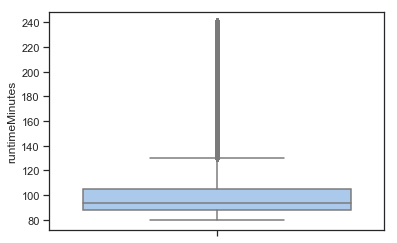

In [10]:
# посмотрим на распределение продолжительности фильмов в минутах:
sns.boxplot(movies.runtimeMinutes, orient='v')

In [11]:
# посмотрим на названия жанров:
genres = tuple(movies.genres.unique())
print(genres[:10])

('\\N', 'Adventure,Fantasy', 'Drama,History', 'Biography,Drama', 'History,War', 'Drama', 'Crime,Drama,Mystery', 'Biography,Drama,History', 'Drama,Fantasy,Horror', 'Crime,Drama')


In [12]:
# каждый фильм относится с одному или сразу нескольким жанрам
# определим функцию, которая позволит отобрать нужные названия жанров в зависимости от заданного поиска

def get_target_genres(data, target):
    target_genres = []
    for genre in data:
        tmp_list = str(genre).lower().split(',') 
        for item in tmp_list:
            if item in target:
                target_genres.append(str(genre))
    return target_genres

В качестве жанров для исследования выберем:
- фэнтези (fantasy)
- ужасы (horror)
- боевик (action)

In [13]:
columns = ['tconst', 'primaryTitle', 'runtimeMinutes', 'genres']

fantasy_genres = get_target_genres(data=genres, target=('fantasy'))
fantasy_movies = movies[movies.genres.isin(fantasy_genres)].loc[:, columns].reset_index(drop=True)

horror_genres = get_target_genres(data=genres, target=('horror'))
horror_movies = movies[movies.genres.isin(horror_genres)].loc[:, columns].reset_index(drop=True)

action_genres = get_target_genres(data=genres, target=('action'))
action_movies = movies[movies.genres.isin(action_genres)].loc[:, columns].reset_index(drop=True)

Так как часть фильмов имеет смешанный жанр, выделим в 3 отдельные группы фильмы, которые:
- относятся к фэнтези, но не относятся к ужасам и боевикам
- относятся к ужасам, но не относится к фэнтези и боевикам
- относятся к боевикам, но не относятся к фэнтези и ужасам

In [14]:
fantasy = tuple(set(fantasy_movies.tconst) - set(horror_movies.tconst) - set(action_movies.tconst))
horror = tuple(set(horror_movies.tconst) - set(fantasy_movies.tconst) - set(action_movies.tconst))
action = tuple(set(action_movies.tconst) - set(fantasy_movies.tconst) - set(horror_movies.tconst))

In [15]:
fantasy_only = fantasy_movies[fantasy_movies.tconst.isin(fantasy)].reset_index(drop=True)
fantasy_only['genres'] = 'fantasy'

horror_only = horror_movies[horror_movies.tconst.isin(horror)].reset_index(drop=True)
horror_only['genres'] = 'horror'

action_only = action_movies[action_movies.tconst.isin(action)].reset_index(drop=True)
action_only['genres'] = 'action'

In [16]:
print(f'Fantasy only: {fantasy_only.shape[0]} movies')
print(f'Horror only: {horror_only.shape[0]} movies')
print(f'Action only: {action_only.shape[0]} movies')

Fantasy only: 4430 movies
Horror only: 11593 movies
Action only: 20225 movies


Получившиеся группы фильмов по жанрам отличаются по количеству.<br>
Для дальнейшнего анализа отберем из каждой группы (жанра) по 4000 наблюдений случайным образом.

In [17]:
n_sample = 4000

y1 = fantasy_only.sample(n=n_sample, random_state=42).runtimeMinutes.values
y2 = horror_only.sample(n=n_sample, random_state=42).runtimeMinutes.values
y3 = action_only.sample(n=n_sample, random_state=42).runtimeMinutes.values

n1 = len(y1)
n2 = len(y2)
n3 = len(y3)

n = n1 + n2 + n3
k = 3

print(f'Fantasy only: {n1}\nHorror only: {n2}\nAction only: {n3}\nTotal: {n}')

Fantasy only: 4000
Horror only: 4000
Action only: 4000
Total: 12000


In [18]:
y1_mean = np.mean(y1)
y2_mean = np.mean(y2)
y3_mean = np.mean(y3)

y1_s2 = np.var(y1, ddof=1)
y2_s2 = np.var(y2, ddof=1)
y3_s2 = np.var(y3, ddof=1)

print(f'Fantasy only runtime: mean = {np.round(y1_mean, 4)}, std = {np.round(y1_s2**0.5, 4)}')
print(f'Horror only runtime: mean = {np.round(y2_mean, 4)}, std = {np.round(y2_s2**0.5, 4)}')
print(f'Action only runtime: mean = {np.round(y3_mean, 4)}, std = {np.round(y3_s2**0.5, 4)}')

Fantasy only runtime: mean = 100.5462, std = 19.0742
Horror only runtime: mean = 93.9222, std = 12.8568
Action only runtime: mean = 105.4715, std = 23.764


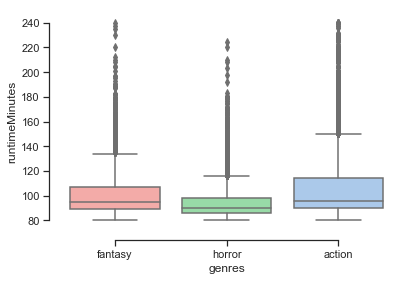

In [19]:
movies_only = pd.concat([fantasy_only, horror_only, action_only]).reset_index(drop=True)

sns.boxplot(x="genres", y="runtimeMinutes", palette=["r", "g", "b"], data=movies_only)
sns.despine(offset=10, trim=True)

In [20]:
y = np.concatenate([y1, y2, y3])

y_mean = np.mean(y)

y_s2 = np.var(y, ddof=1)

print(f'Total runtime: mean = {np.round(y_mean, 4)}, std = {np.round(y_s2**0.5, 4)}')

Total runtime: mean = 99.98, std = 19.671


In [21]:
ss_g = np.sum((y - y_mean)**2)
ss_f = ((y1_mean - y_mean)**2) * n1 + ((y2_mean - y_mean)**2) * n2 + ((y3_mean - y_mean)**2) * n3
ss_r = np.sum((y1 - y1_mean)**2) + np.sum((y2 - y2_mean)**2) + np.sum((y3 - y3_mean)**2)

print(f'Сумма квадратов отклонений наблюдений от общего среднего: {np.round(ss_g, 4)}')
print(f'Сумма квадратов отклонений средних групповых значений от общего среднего: {np.round(ss_f, 4)}')
print(f'Остаточная сумма квадратов отклонений: {np.round(ss_r, 4)}')

Сумма квадратов отклонений наблюдений от общего среднего: 4642993.2
Сумма квадратов отклонений средних групповых значений от общего среднего: 268694.1855
Остаточная сумма квадратов отклонений: 4374299.0145


In [22]:
s2_g = ss_g / (n - 1)
s2_f = ss_f / (k - 1)
s2_r = ss_r / (n - k)

print(f'Общая дисперсия: {np.round(s2_g, 4)}')
print(f'Факторная дисперсия: {np.round(s2_f, 4)}')
print(f'Остаточная дисперсия: {np.round(s2_r, 4)}')

Общая дисперсия: 386.9483
Факторная дисперсия: 134347.0928
Остаточная дисперсия: 364.6161


Распределение Фишера–Снедекора (F-распределение): https://www.matburo.ru/tv/table_fisher.pdf  
a = 0.01, v1 = k - 1 = 2, v2 = n - k = >60  
Fтабл = 4.60

In [23]:
f_h = s2_f / s2_r
f_critical = 4.60 

print(f'F = {np.round(f_h, 4)}')
print(f'F_critical = {np.round(f_critical, 4)}')

F = 368.4618
F_critical = 4.6


Полученное значение F = 368.4618 > Fкрит = 4.6.<br>
Таким образом, для фильмов продолжительностью [80, 240] минут, относящихся к жанрам фэнтези, ужасы и боевик, средняя продолжительность фильма зависит от жанра.<br>
Принимаем гипотезу H1.